In [ ]:
!pip install pandas matplotlib openpyxl

In [4]:
#R1 les amis directes d'un internaute d'in =46 
cozo :   ?[p2] :=  *edge[id_e,  p1, p2],*edge_label[id_e, "knows"], p1 =46'
neo4j : 
MATCH (p1)-[:KNOWS]->(p2)  
WHERE p1.id = 46  
RETURN p2.id

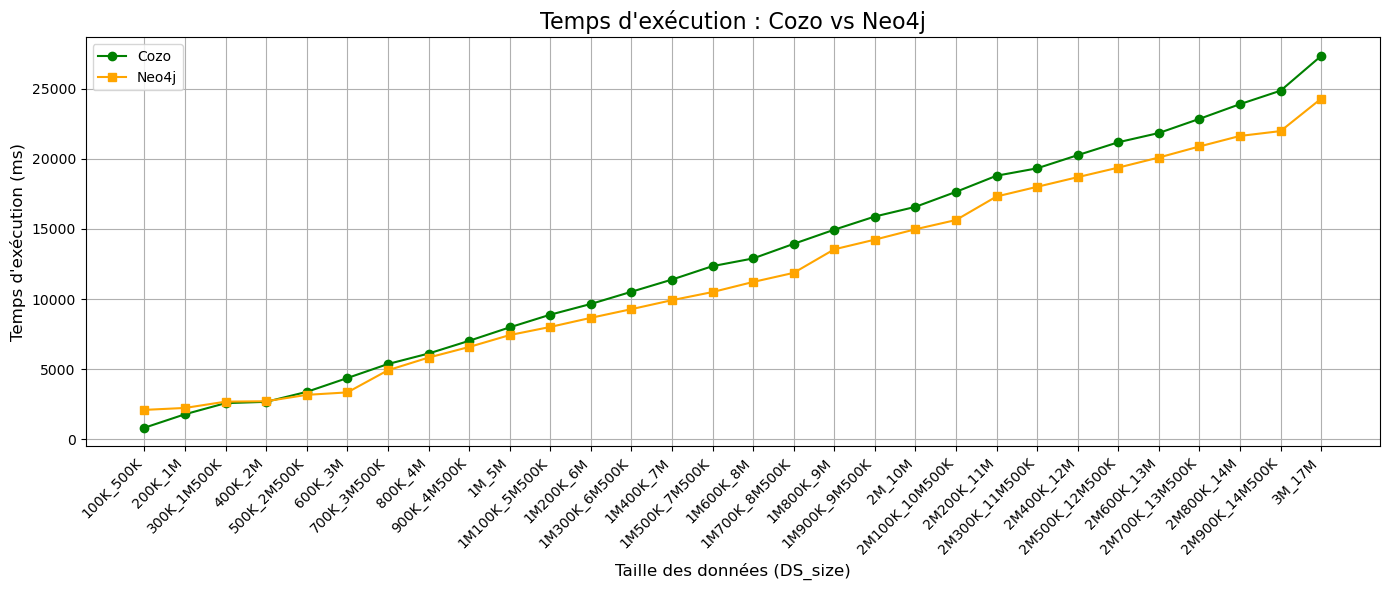

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "Execution_Times_Cozo_vs_Neo4j_R1.xlsx"

df = pd.read_excel(file_path)


plt.figure(figsize=(14, 6))
plt.plot(df['DS_size'], df['Cozo'], marker='o', color='green', label='Cozo')
plt.plot(df['DS_size'], df['neo4j'], marker='s', color='orange', label='Neo4j')

# Ajouter titre et axes
plt.title("Temps d'exécution : Cozo vs Neo4j", fontsize=16)
plt.xlabel("Taille des données (DS_size)", fontsize=12)
plt.ylabel("Temps d'exécution (ms)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_cozo_vs_neo4j_R1.png")
plt.show()


In [ ]:
#R2  Nombre des commentaires aimés par un user donné DONT la LONGUEUR <500
cozo :   
?[count(c)] :=
  *node_label[u, "person"],
  *edge[e, u, c],
  *edge_label[e, "likes"],
  *node_label[c, "comment"],
 *node_prop[c, "length",len], len < "500", u = 24


neo4j : 
MATCH (p:PERSON )-[:LIKES]->(c:COMMENT)
WHERE  toInteger(c.length) < 500 AND  p.id=24  
RETURN count(c) AS nb_comments_liked 


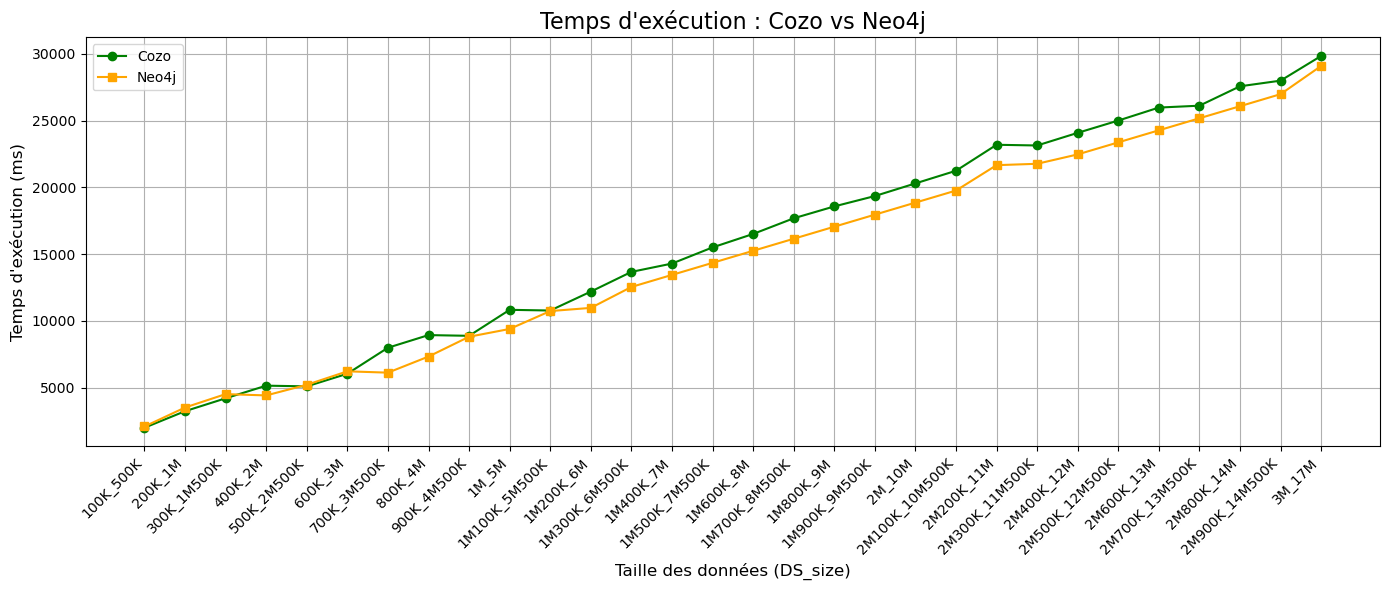

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "Execution_Times_Cozo_vs_Neo4j_R2.xlsx"

df = pd.read_excel(file_path)


plt.figure(figsize=(14, 6))
plt.plot(df['DS_size'], df['Cozo'], marker='o', color='green', label='Cozo')
plt.plot(df['DS_size'], df['neo4j'], marker='s', color='orange', label='Neo4j')

# Ajouter titre et axes
plt.title("Temps d'exécution : Cozo vs Neo4j", fontsize=16)
plt.xlabel("Taille des données (DS_size)", fontsize=12)
plt.ylabel("Temps d'exécution (ms)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_cozo_vs_neo4j_R2.png")
plt.show()

In [ ]:
#R3 Nombre de likes d'une publication par son tag donné

#cozo 
?[count(e2)] :=
  *node_label[post, "post"],
  *edge[e1, post, tag],
  *edge_label[e1, "hasTag"],
  *node_prop[tag, "name", tag],
  tag="Tech",
 *edge[e2, person, post],
  *edge_label[e2, "likes"]
  
#neo4j
MATCH (t:TAG)<-[:HASTAG]-(post:POST)<-[l:LIKES]-(person:PERSON)
WHERE t.name="Tech"
RETURN count(l) AS nb_likes


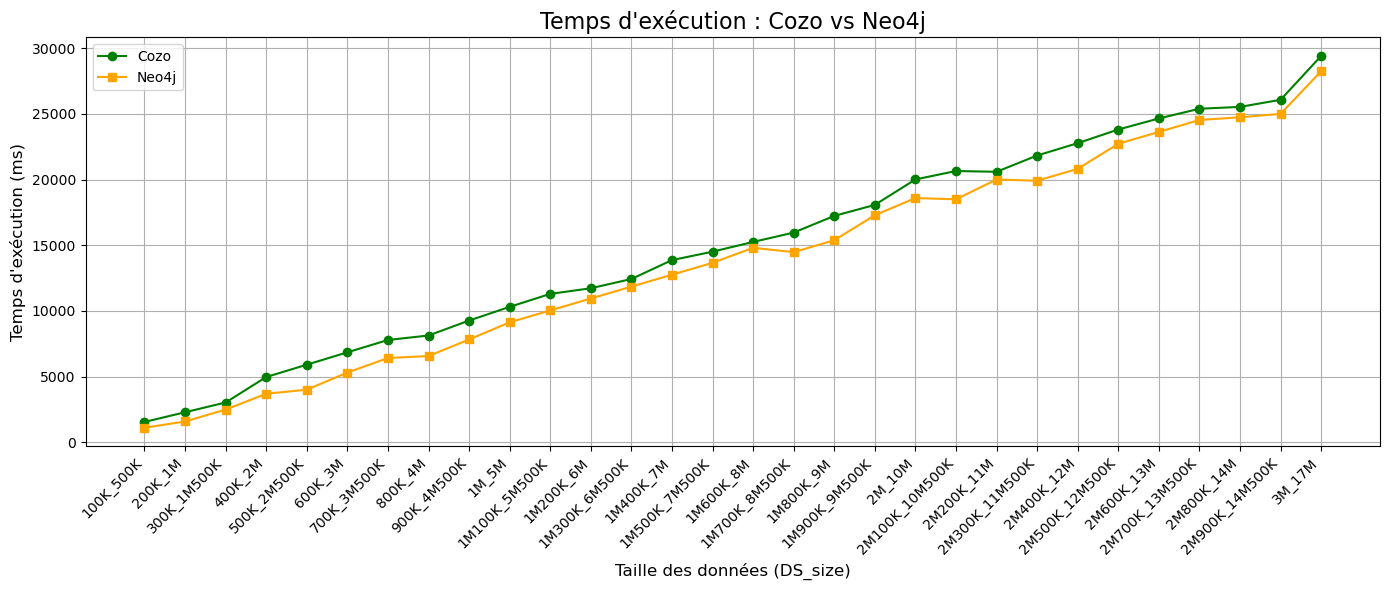

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "Execution_Times_Cozo_vs_Neo4j_R3.xlsx"

df = pd.read_excel(file_path)


plt.figure(figsize=(14, 6))
plt.plot(df['DS_size'], df['Cozo'], marker='o', color='green', label='Cozo')
plt.plot(df['DS_size'], df['neo4j'], marker='s', color='orange', label='Neo4j')

# Ajouter titre et axes
plt.title("Temps d'exécution : Cozo vs Neo4j", fontsize=16)
plt.xlabel("Taille des données (DS_size)", fontsize=12)
plt.ylabel("Temps d'exécution (ms)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_cozo_vs_neo4j_R3.png")
plt.show()

In [ ]:
#R4 Emplacement des users utilisant Chrome

#Cozo : 
?[placeName] :=
  *node_label[person, "person"],
  *node_prop[person, "browserUsed", "Chrome"],
  *edge[e, person, place],
  *edge_label[e, "isLocatedIn"],
  *node_prop[place, "name", placeName]
#noe4j : 

MATCH (p:PERSON)-[:ISLOCATEDIN]->(place:PLACE)
WHERE p.browserUsed = "Chrome"
RETURN place.name AS placeName




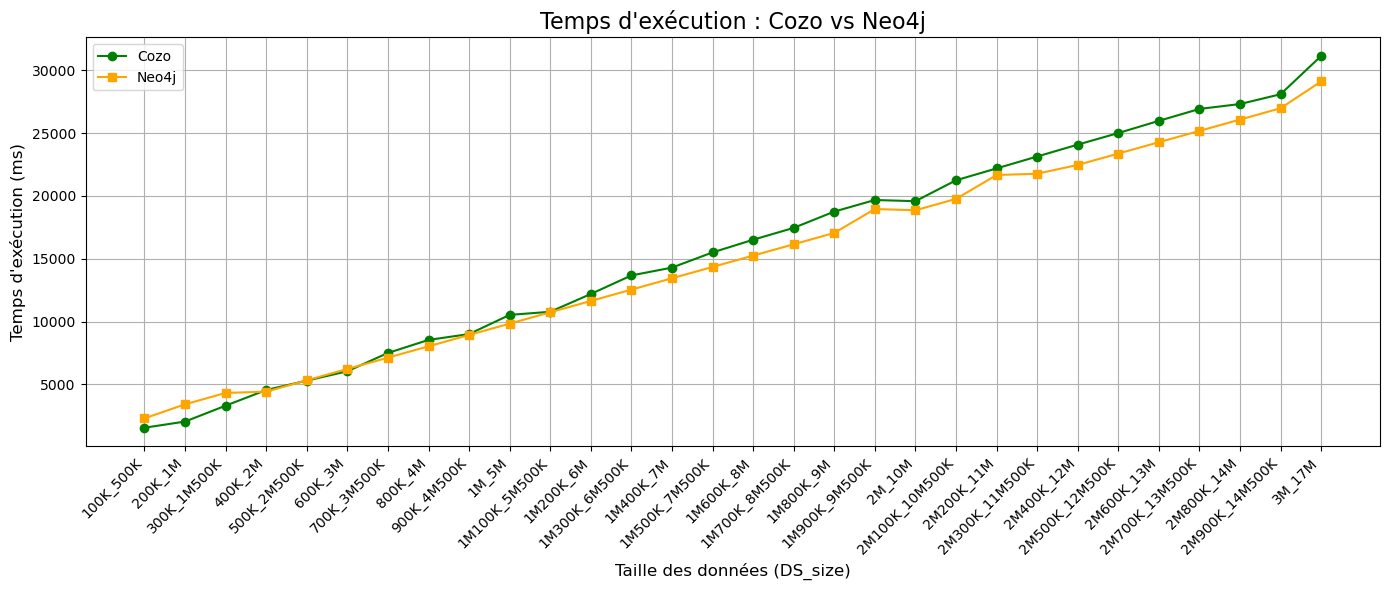

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "Execution_Times_Cozo_vs_Neo4j_R4.xlsx"

df = pd.read_excel(file_path)


plt.figure(figsize=(14, 6))
plt.plot(df['DS_size'], df['Cozo'], marker='o', color='green', label='Cozo')
plt.plot(df['DS_size'], df['neo4j'], marker='s', color='orange', label='Neo4j')

# Ajouter titre et axes
plt.title("Temps d'exécution : Cozo vs Neo4j", fontsize=16)
plt.xlabel("Taille des données (DS_size)", fontsize=12)
plt.ylabel("Temps d'exécution (ms)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_cozo_vs_neo4j_R4.png")
plt.show()

In [ ]:
#R5 Nombre de replyOf entre un commentaire donné et une publication donnée
#(Chemin de commentaires en replyOf jusqu'à la publication)

#cozo : 

?[p, c1, count(e2)] :=
  *edge[e1, c1, p],
  *edge_label[e, "replyOf"],
  *node_label[p, "post"],
  *edge[e2, c2, c1],
  *edge_label[e2, "replyOf"]
 

#neo4j : 
MATCH path = (c2:COMMENT)-[:REPLY_OF*]->(c1:COMMENT)-[:REPLY_OF]->(p:POST)
RETURN p.id, c1.id, length(path) AS reply_chain_length



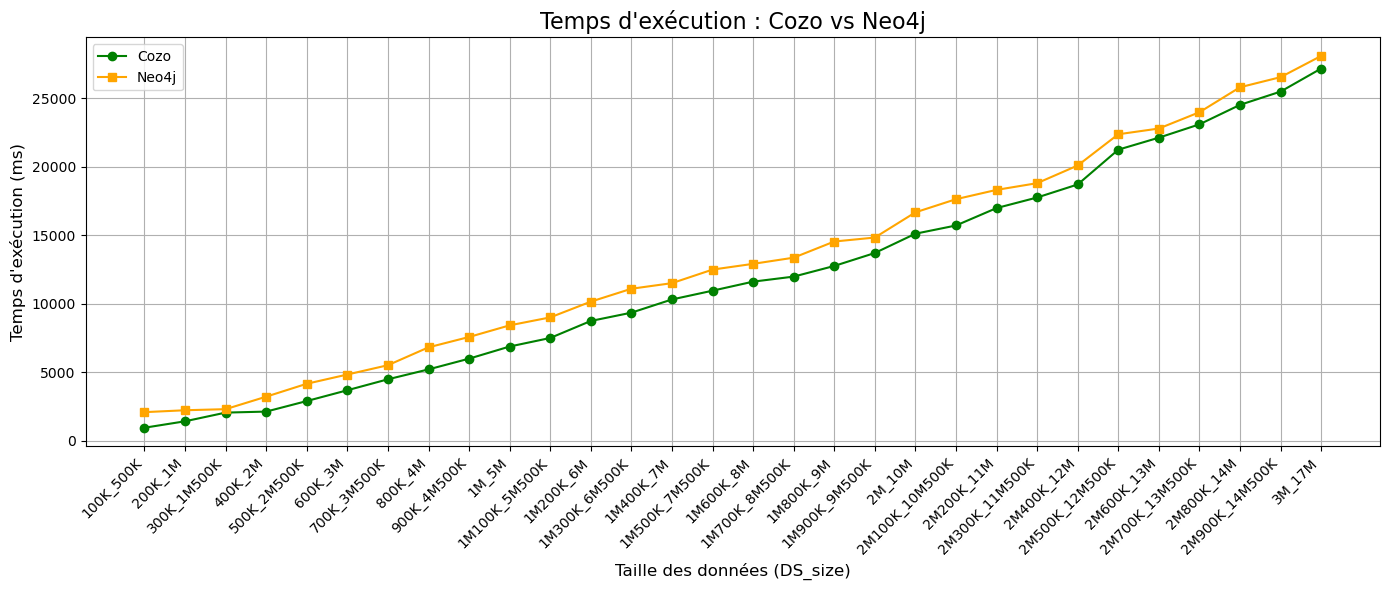

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "Execution_Times_Cozo_vs_Neo4j_R5.xlsx"

df = pd.read_excel(file_path)


plt.figure(figsize=(14, 6))
plt.plot(df['DS_size'], df['Cozo'], marker='o', color='green', label='Cozo')
plt.plot(df['DS_size'], df['neo4j'], marker='s', color='orange', label='Neo4j')

# Ajouter titre et axes
plt.title("Temps d'exécution : Cozo vs Neo4j", fontsize=16)
plt.xlabel("Taille des données (DS_size)", fontsize=12)
plt.ylabel("Temps d'exécution (ms)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_cozo_vs_neo4j_R5.png")
plt.show()